___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

from mlxtend.plotting import plot_confusion_matrix
from ipywidgets import interact

from keras.layers import Dropout
from keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna


In [2]:
pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum().any()

False

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [6]:
#Drop unnecessary columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
# shape after drop unnecessary columns
df.shape

(10000, 11)

In [ ]:
df.select_dtypes(include=['object']).nunique()

Geography    3
Gender       2
dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

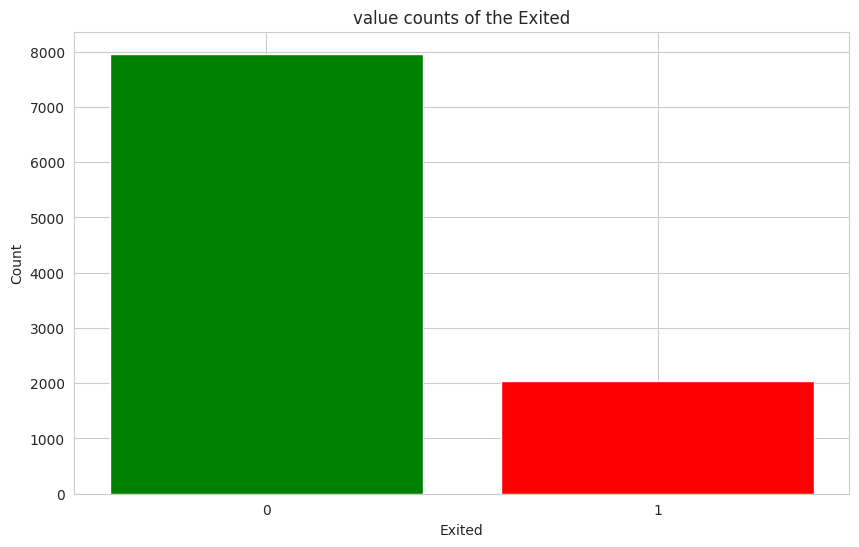

In [ ]:
# we want get the counts of the 'Exited' column
exited_numbers = df['Exited'].value_counts()

bar_names = exited_numbers.index.astype(str).tolist()
heights = exited_numbers.values.tolist()

# Create a bar chart of the value counts
plt.bar(bar_names, heights)
colors = ['green', 'red']
plt.bar(bar_names, heights, color=colors)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('value counts of the Exited')
plt.show()

In [ ]:
df.groupby('Gender')['Exited'].value_counts().unstack()

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
df.groupby('Geography')['Exited'].value_counts().unstack()

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


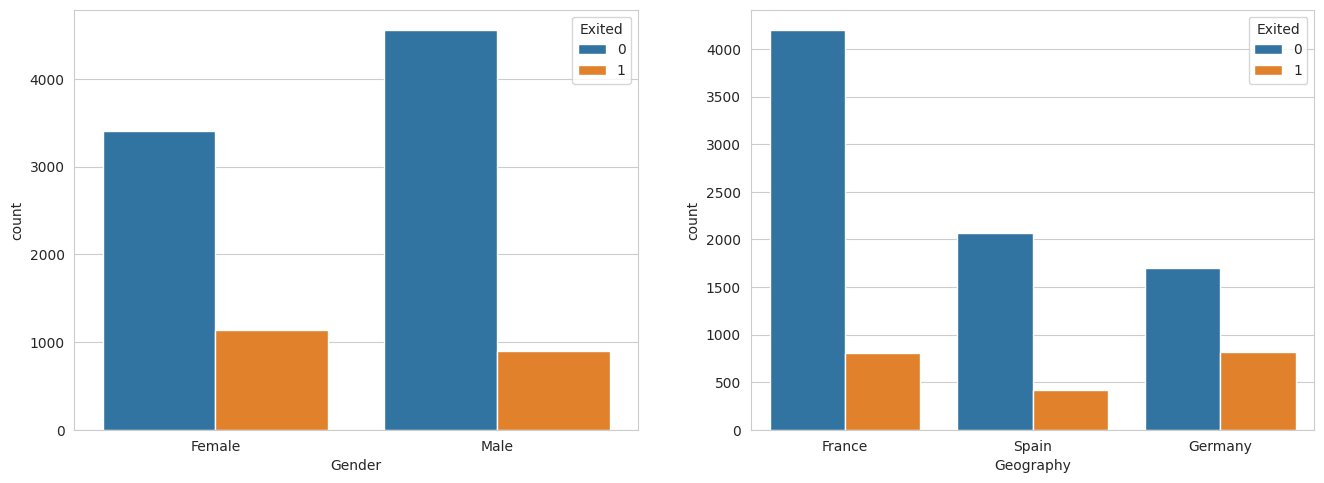

In [ ]:
#To learn and understand customer behavior we need to know the effect of gender and region on the customer
categorical = ["Gender", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in categorical:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

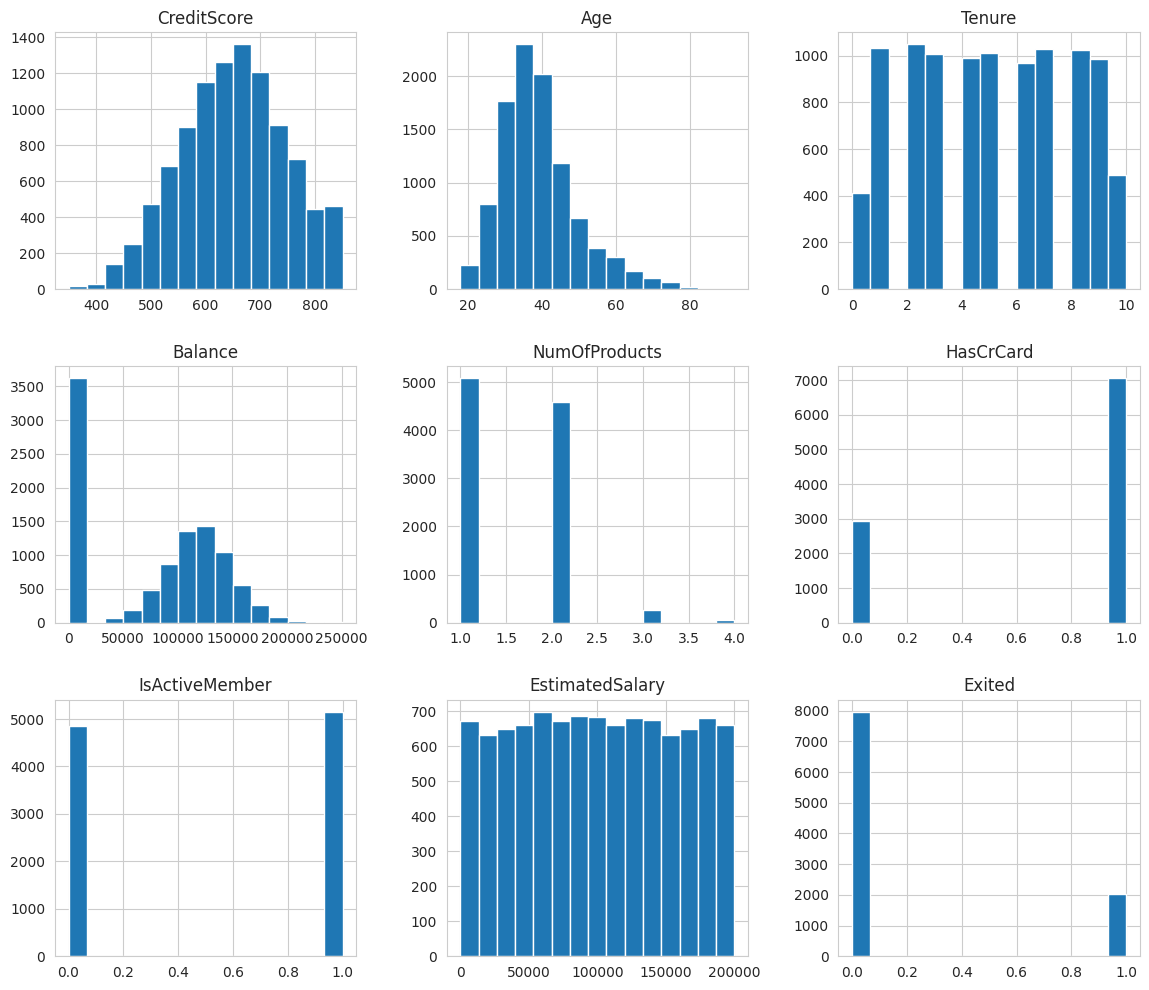

In [ ]:
#create a histogram for each numerical column in the DataFrame
df.hist(figsize=(14, 12), bins=15);


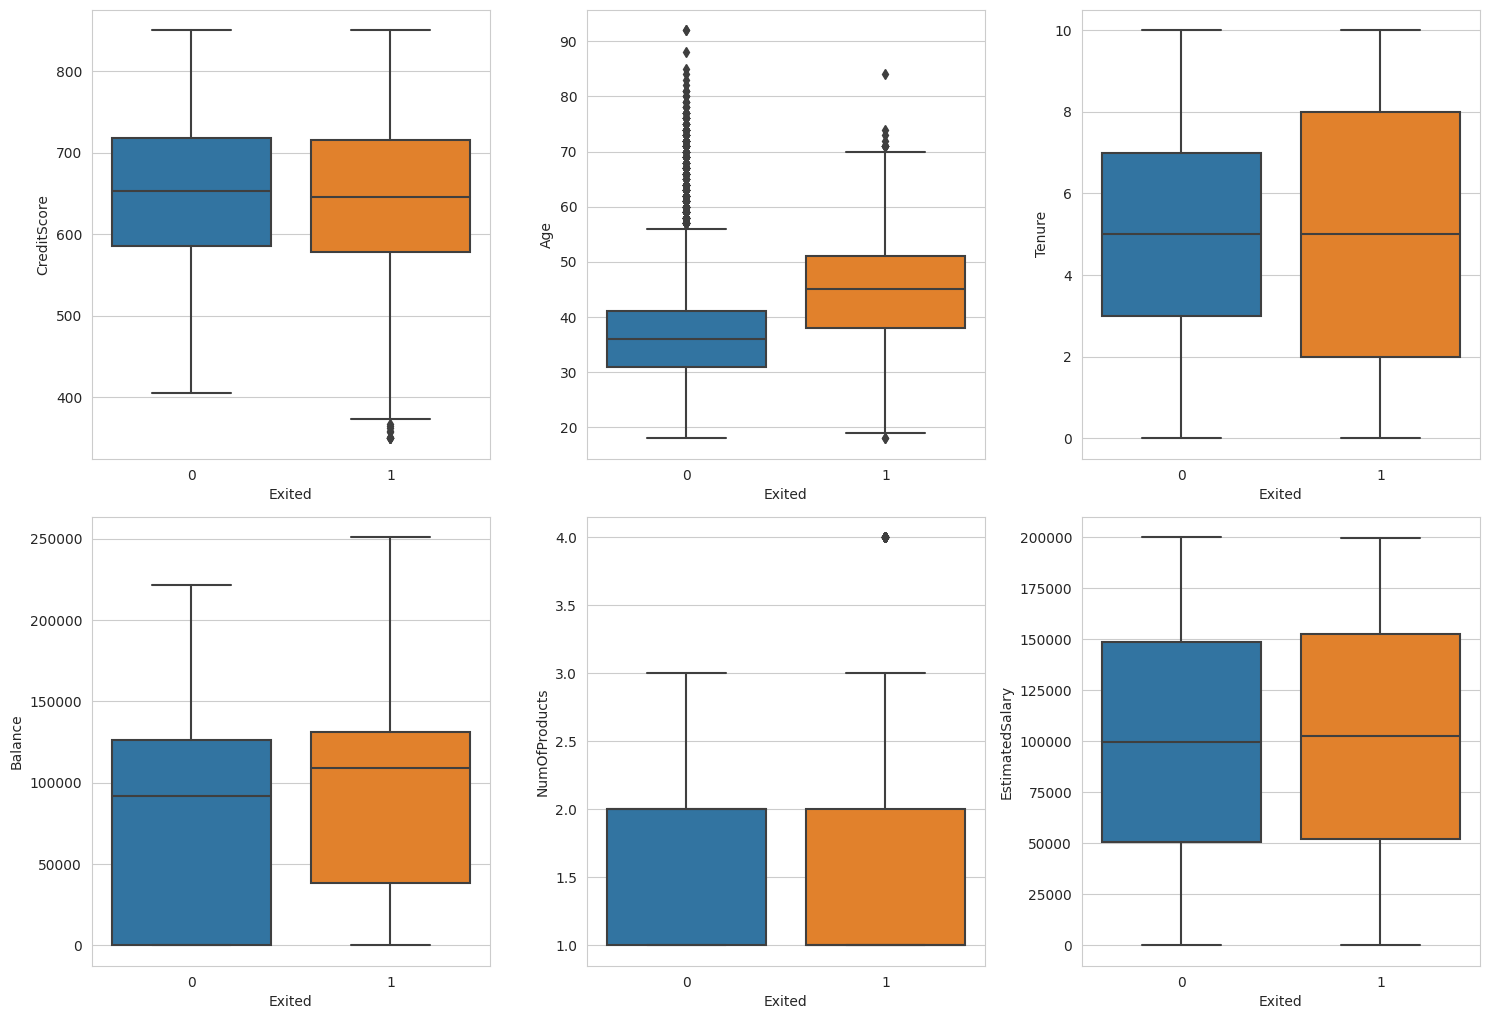

In [ ]:
## Here we could see if there's any potential outliers
fig = plt.figure(figsize=(15,20))
custom_df = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]
for i, col in enumerate(custom_df.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x=df['Exited'], y=custom_df[col], data=custom_df)

plt.tight_layout();

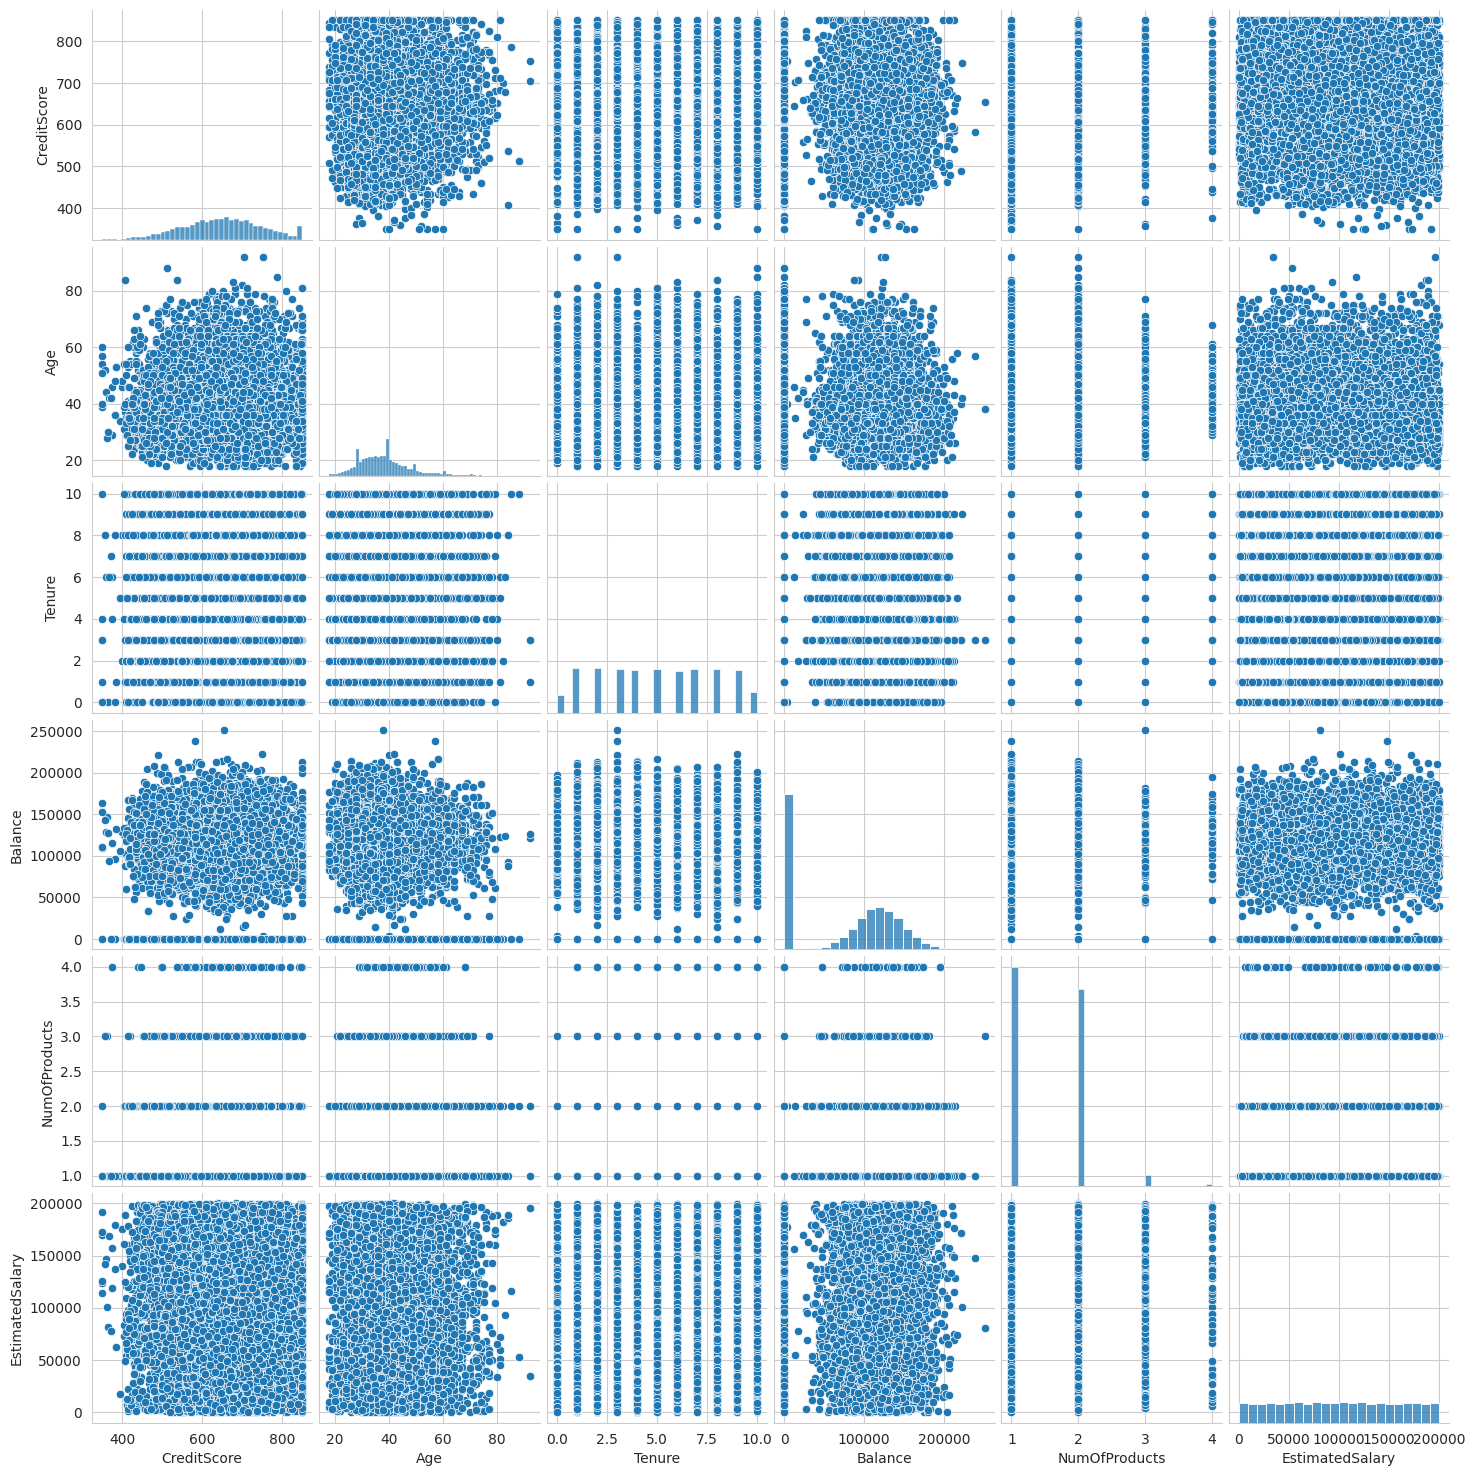

In [ ]:
sns.pairplot(custom_df)
plt.show()

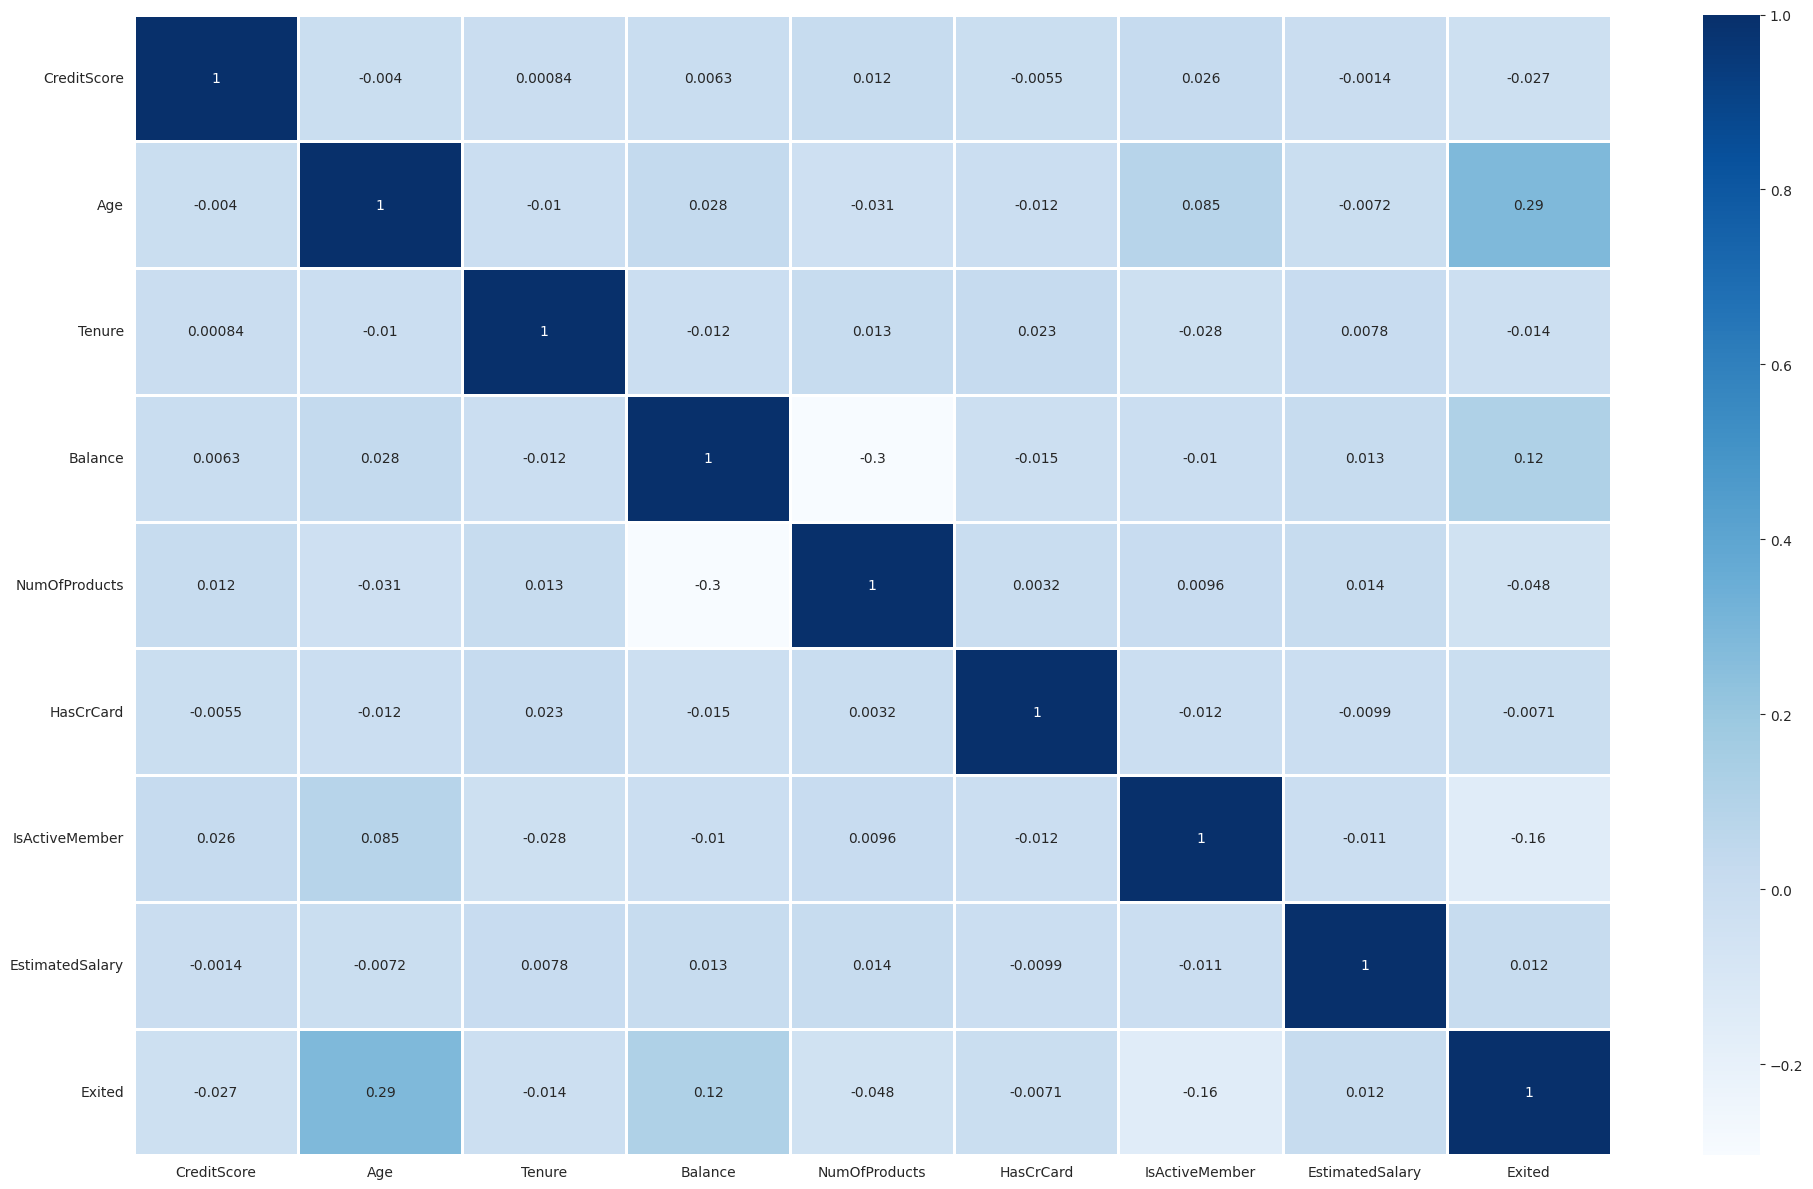

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidth =2 , cmap="Blues")
plt.tight_layout()

Text(0.5, 1.0, 'Features Correlation with Exited')

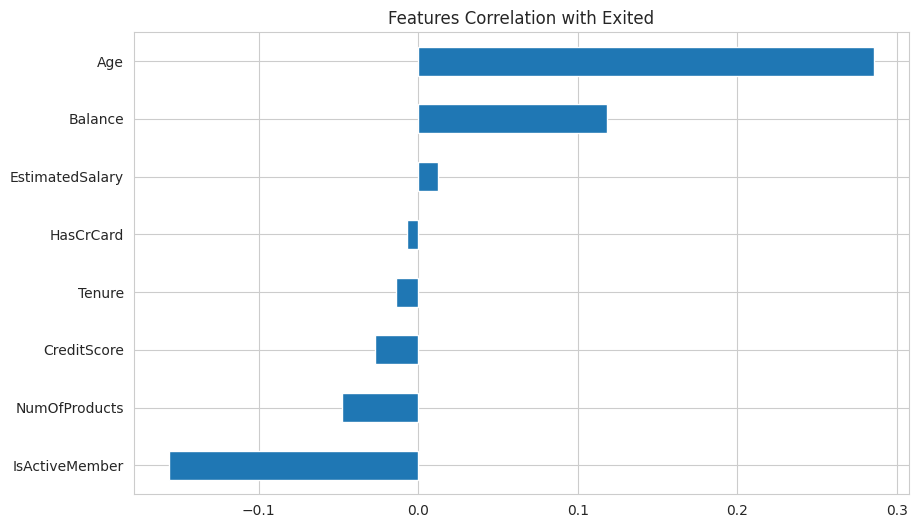

In [ ]:
#understanding which variables have the strongest or weakest correlation with a Exited coulmn.
df.corr()['Exited'][:-1].sort_values().plot.barh()
plt.title("Features Correlation with Exited")


In [7]:
#perform one-hot encoding on categorical variables
#The categorical variable are converted into binary columns for each unique category.
df = pd.get_dummies(df, drop_first=False)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
X = df.drop("Exited", axis =1)
y = df["Exited"]

In [10]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1,  random_state=seed)

In [11]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [12]:
X_train.shape

(9000, 13)

In [ ]:
X_test.shape

(1000, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [13]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [14]:
from tensorflow import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay, roc_auc_score, roc_curve,precision_recall_curve,average_precision_score,recall_score
from sklearn.model_selection import cross_val_score, cross_validate,GridSearchCV
from keras.optimizers.legacy import Adam
from sklearn.utils import class_weight



In [15]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))    # add the input layer and the first hidden layer
model.add(Dense(8, activation="relu"))     # add the second hidden layer
model.add(Dense(1, activation="sigmoid"))   # add the output layer

opt = Adam(lr=0.002)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [16]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,)

Epoch 1/200
64/64 [==============================] - 1s 9ms/step - loss: 0.5818 - recall: 0.0793 - val_loss: 0.4935 - val_recall: 0.0000e+00
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4881 - recall: 0.0000e+00 - val_loss: 0.4641 - val_recall: 0.0110
Epoch 3/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4740 - recall: 0.0242 - val_loss: 0.4554 - val_recall: 0.0110
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4666 - recall: 0.0254 - val_loss: 0.4476 - val_recall: 0.0331
Epoch 5/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4599 - recall: 0.0696 - val_loss: 0.4407 - val_recall: 0.0608
Epoch 6/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4522 - recall: 0.0460 - val_loss: 0.4310 - val_recall: 0.0387
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.4443 - recall: 0.0823 - val_loss: 0.4204 - val_recall: 0.0939
Epoch 8/200
64/64 [==============

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                224       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


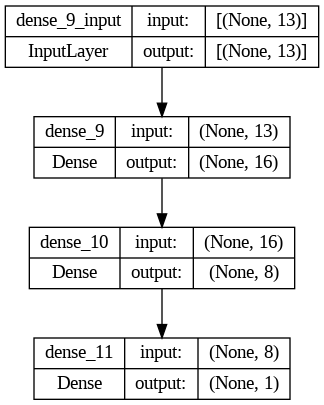

In [ ]:
# create a visual representation of a  model architecture.
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head(100)

,loss,recall,val_loss,val_recall
0,0.548,0.050,0.493,0.000
1,0.486,0.002,0.461,0.011
2,0.467,0.053,0.442,0.083
3,0.452,0.088,0.423,0.160
4,0.441,0.154,0.412,0.166
...,...,...,...,...
95,0.334,0.469,0.294,0.525
96,0.335,0.480,0.293,0.519
97,0.334,0.478,0.295,0.492
98,0.334,0.466,0.291,0.575


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

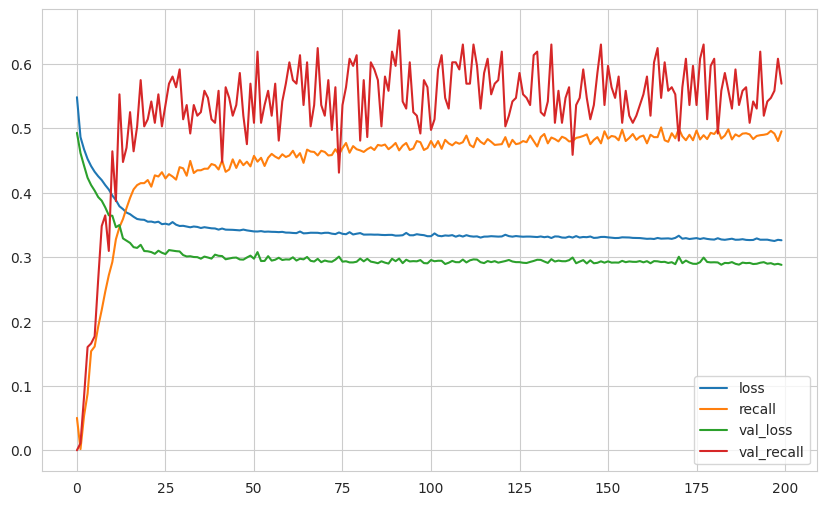

In [ ]:
# We can easily turn that training history into a dataframe since it's a dict type.
loss_df.plot()
plt.show()

	Train_Set

282/282 [==============================] - 0s 2ms/step


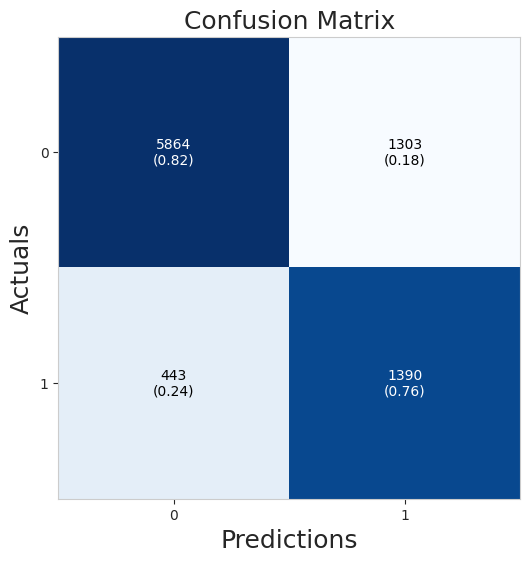


282/282 [==============================] - 1s 2ms/step
[[5864 1303]
 [ 443 1390]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      7167
           1       0.52      0.76      0.61      1833

    accuracy                           0.81      9000
   macro avg       0.72      0.79      0.74      9000
weighted avg       0.85      0.81      0.82      9000



In [36]:
print("\tTrain_Set\n")
y_predctp = model.predict(X_train) > 0.5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_predctp), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

y_pred = (model.predict(X_train) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

32/32 [==============================] - 0s 2ms/step
	Test_Set



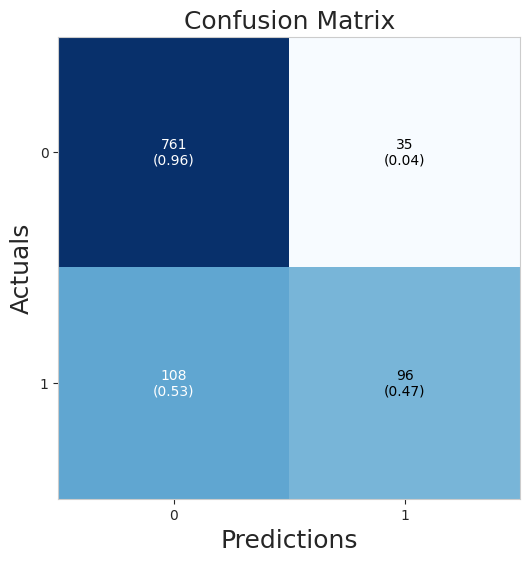

In [17]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\tTest_Set\n")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[764  32]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.46      0.57       204

    accuracy                           0.86      1000
   macro avg       0.81      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



32/32 [==============================] - 0s 4ms/step


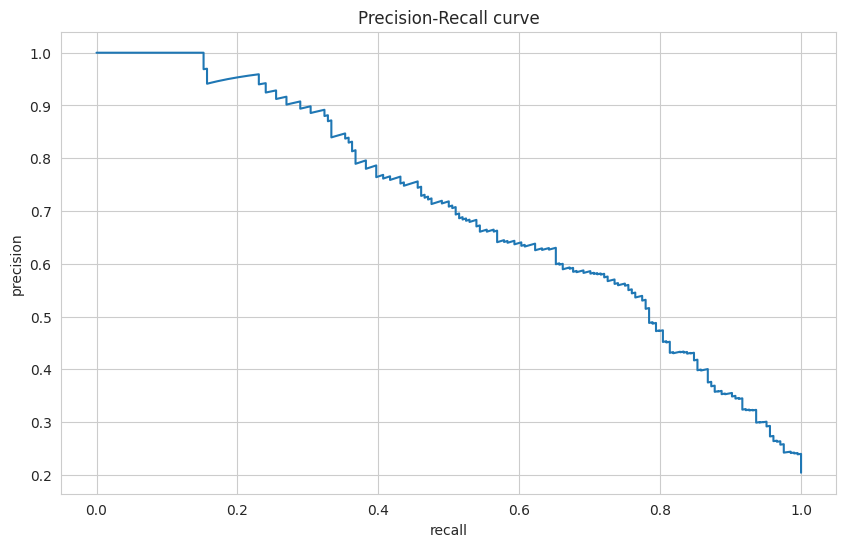

In [17]:
y_predctp= model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_predctp)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall curve')
plt.show()

In [18]:
average_precision_score(y_test, y_predctp)

0.7013523739666874

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [18]:
model_w = Sequential()

tf.random.set_seed(seed)

model_w.add(Dense(16, activation="relu"))
model_w.add(Dense(8, activation="relu"))
model_w.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model_w.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [19]:

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [20]:
model_w.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.6537 - recall: 0.6029 - val_loss: 0.6240 - val_recall: 0.6022
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6312 - recall: 0.6144 - val_loss: 0.6240 - val_recall: 0.6906
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6162 - recall: 0.6689 - val_loss: 0.5855 - val_recall: 0.6740
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6006 - recall: 0.6870 - val_loss: 0.5606 - val_recall: 0.6685
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5895 - recall: 0.6943 - val_loss: 0.5562 - val_recall: 0.6519
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5805 - recall: 0.7010 - val_loss: 0.4908 - val_recall: 0.5856
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5750 - recall: 0.7004 - val_loss: 0.5569 - val_recall: 0.7238
Epoch 8/200
64/64 [======================

In [42]:
loss_df = pd.DataFrame(model_w.history.history)
loss_df.head(100)

,loss,recall,val_loss,val_recall
0,0.694,0.728,0.676,0.591
1,0.672,0.435,0.652,0.707
2,0.633,0.659,0.595,0.702
3,0.608,0.699,0.553,0.680
4,0.588,0.696,0.546,0.691
...,...,...,...,...
95,0.457,0.768,0.384,0.768
96,0.459,0.755,0.406,0.807
97,0.459,0.754,0.378,0.768
98,0.458,0.757,0.416,0.812


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

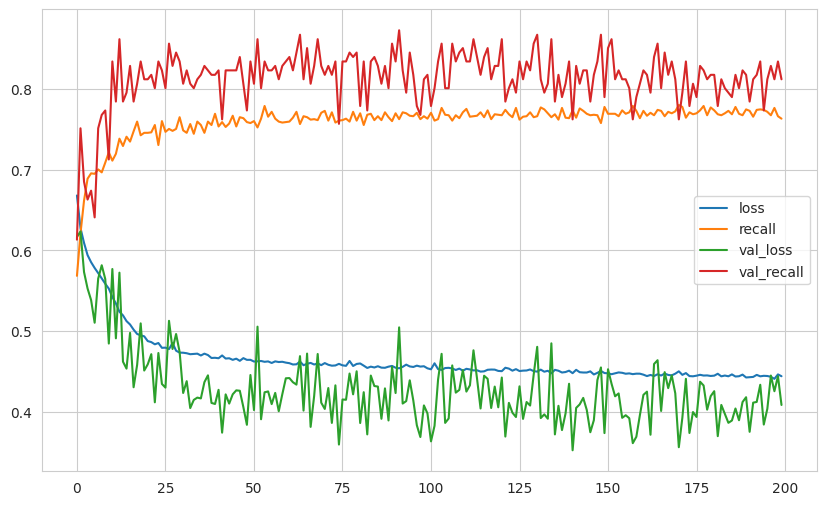

In [23]:
loss_df = pd.DataFrame(model_w.history.history)
loss_df.plot()

	Train_Set

282/282 [==============================] - 1s 2ms/step


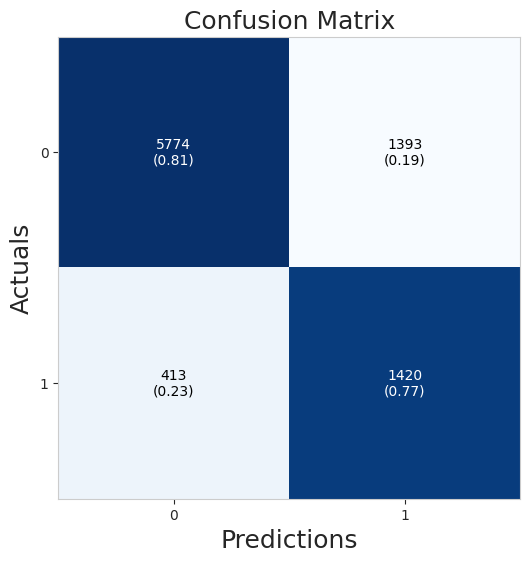


282/282 [==============================] - 0s 2ms/step
[[5774 1393]
 [ 413 1420]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      7167
           1       0.50      0.77      0.61      1833

    accuracy                           0.80      9000
   macro avg       0.72      0.79      0.74      9000
weighted avg       0.85      0.80      0.81      9000



In [43]:
print("\tTrain_Set\n")
y_predctp = model_w.predict(X_train) > 0.5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_predctp), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

y_pred = (model_w.predict(X_train) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))


32/32 [==============================] - 0s 2ms/step
	Test_Set



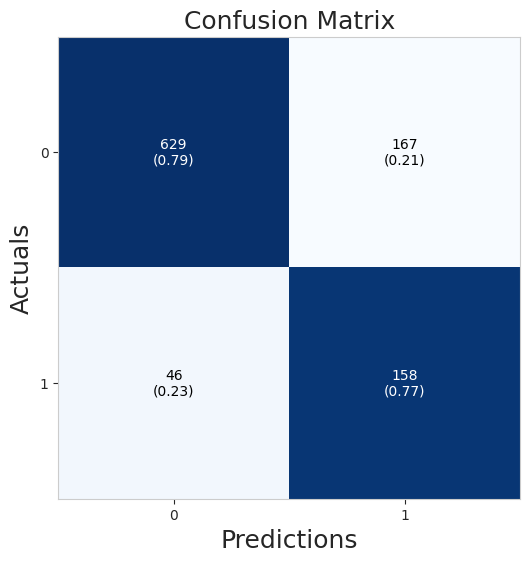

[[629 167]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       796
           1       0.49      0.77      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.79      0.80      1000



In [45]:
y_pred = (model_w.predict(X_test) > 0.5).astype("int32")
print("\tTest_Set\n")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


32/32 [==============================] - 0s 2ms/step


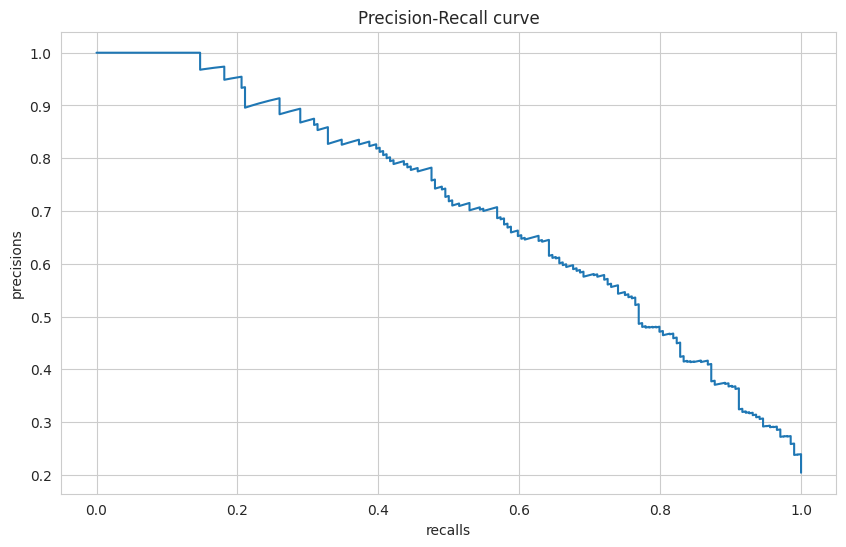

In [23]:
y_predctp = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_predctp)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [21]:
model_with_lr = Sequential()

tf.random.set_seed(seed)

model_with_lr.add(Dense(16, activation="relu"))
model_with_lr.add(Dense(8, activation="relu"))
model_with_lr.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.02)
model_with_lr.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [22]:
model_with_lr.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.6452 - recall: 0.6568 - val_loss: 0.6488 - val_recall: 0.7845
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6012 - recall: 0.6671 - val_loss: 0.6345 - val_recall: 0.8177
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5812 - recall: 0.6943 - val_loss: 0.5051 - val_recall: 0.6906
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5517 - recall: 0.7191 - val_loss: 0.5126 - val_recall: 0.8011
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5369 - recall: 0.7282 - val_loss: 0.4452 - val_recall: 0.7735
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5105 - recall: 0.7427 - val_loss: 0.5410 - val_recall: 0.8453
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4958 - recall: 0.7488 - val_loss: 0.3644 - val_recall: 0.7017
Epoch 8/200
64/64 [======================

In [49]:
loss_df = pd.DataFrame(model_with_lr.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.646,0.627,0.613,0.746
1,0.596,0.676,0.636,0.862
2,0.573,0.674,0.502,0.713
3,0.540,0.707,0.523,0.801
4,0.513,0.728,0.469,0.823


<Axes: >

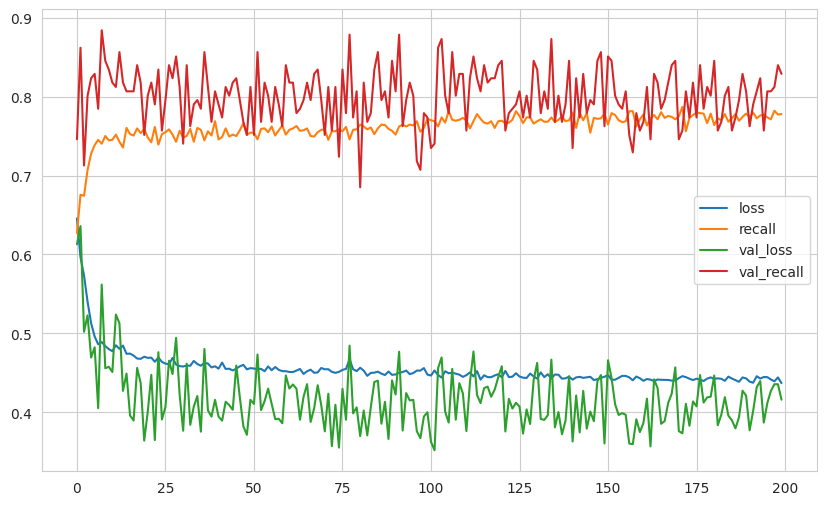

In [50]:
loss_df.plot()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

	Train_Set

282/282 [==============================] - 1s 2ms/step


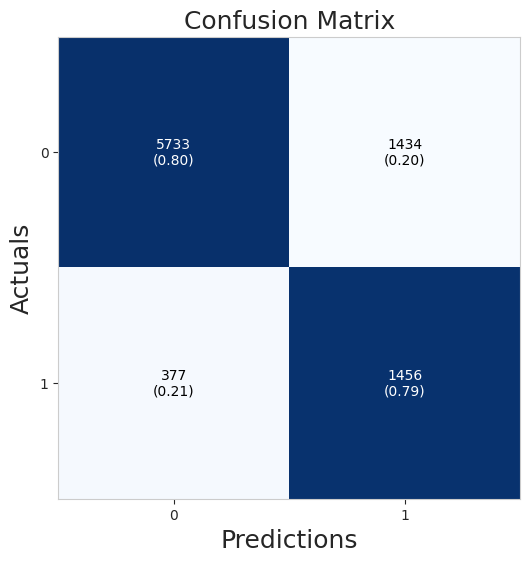


282/282 [==============================] - 0s 2ms/step
[[5733 1434]
 [ 377 1456]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7167
           1       0.50      0.79      0.62      1833

    accuracy                           0.80      9000
   macro avg       0.72      0.80      0.74      9000
weighted avg       0.85      0.80      0.81      9000



In [51]:
print("\tTrain_Set\n")
y_predctp = model_with_lr.predict(X_train) > 0.5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_predctp), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

y_pred = (model_with_lr.predict(X_train) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

32/32 [==============================] - 0s 2ms/step
	Test_Set



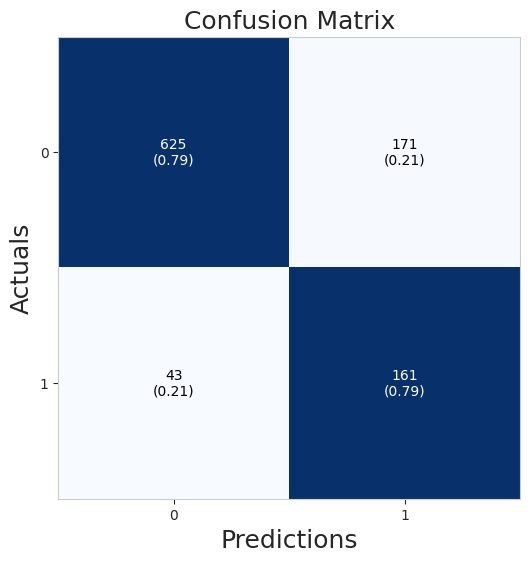

[[625 171]
 [ 43 161]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.85       796
           1       0.48      0.79      0.60       204

    accuracy                           0.79      1000
   macro avg       0.71      0.79      0.73      1000
weighted avg       0.84      0.79      0.80      1000



In [52]:
y_pred = (model_with_lr.predict(X_test) > 0.5).astype("int32")
print("\tTest_Set\n")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step


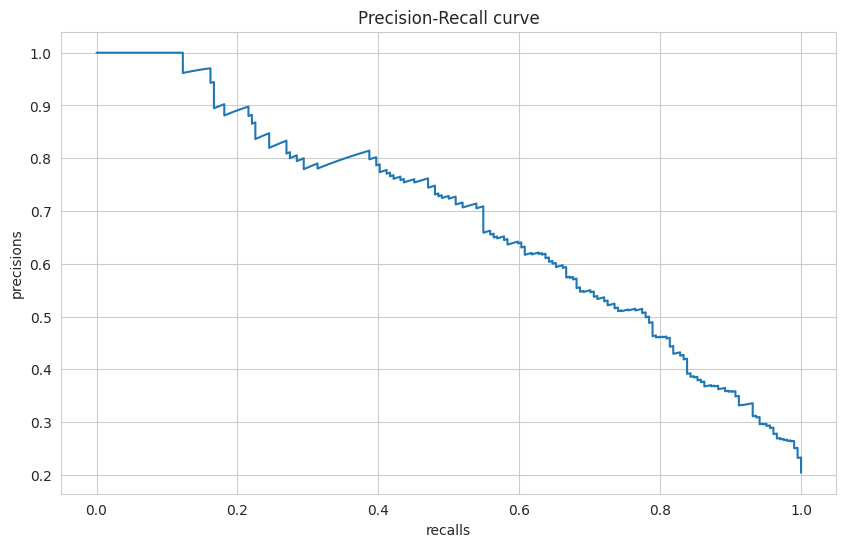

In [53]:
y_predctp = model_with_lr.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_predctp)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

### Add Dropout Layer

In [23]:
# add dropout layers to prevent overfitting
model_with_drop = Sequential()

tf.random.set_seed(seed)

model_with_drop.add(Dense(16, activation="relu"))
model_with_drop.add(Dropout(0.2))
model_with_drop.add(Dense(8, activation="relu"))
model_with_drop.add(Dropout(0.2))
model_with_drop.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.02)
model_with_drop.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [24]:
model_with_drop.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.6611 - recall: 0.6913 - val_loss: 0.6574 - val_recall: 0.7790
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6266 - recall: 0.6519 - val_loss: 0.6141 - val_recall: 0.7680
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5994 - recall: 0.6628 - val_loss: 0.5171 - val_recall: 0.6685
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5789 - recall: 0.6689 - val_loss: 0.5531 - val_recall: 0.7956
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5655 - recall: 0.7088 - val_loss: 0.4574 - val_recall: 0.6354
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5625 - recall: 0.6762 - val_loss: 0.4421 - val_recall: 0.7072
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5505 - recall: 0.7028 - val_loss: 0.4961 - val_recall: 0.8398
Epoch 8/200
64/64 [======================

In [71]:
loss_df = pd.DataFrame(model_with_drop.history.history)
loss_df.tail(30)

,loss,recall,val_loss,val_recall
170,0.502,0.774,0.435,0.823
171,0.494,0.753,0.407,0.818
172,0.496,0.757,0.408,0.807
173,0.486,0.762,0.407,0.779
174,0.497,0.757,0.393,0.818
175,0.490,0.760,0.433,0.845
176,0.504,0.752,0.497,0.818
177,0.492,0.742,0.501,0.867
178,0.504,0.758,0.425,0.796
179,0.497,0.755,0.442,0.796


### Evaluate The Model

<Axes: >

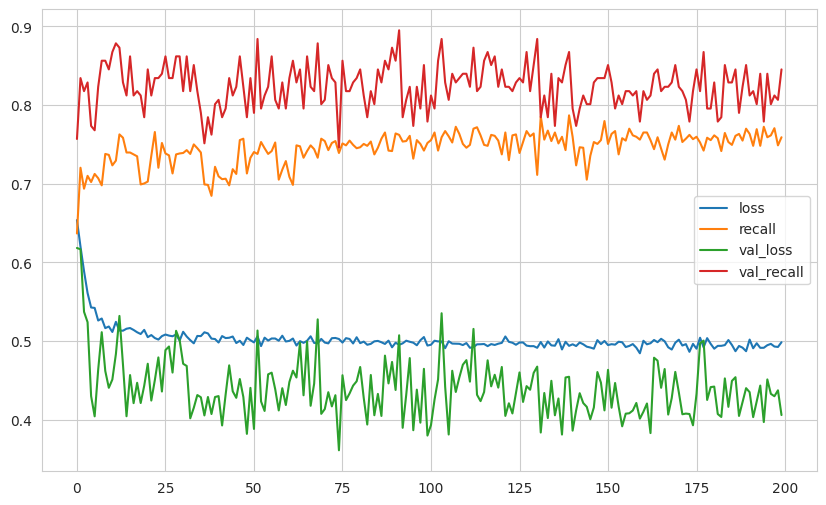

In [72]:
loss_df.plot()

	Train_Set

282/282 [==============================] - 1s 3ms/step


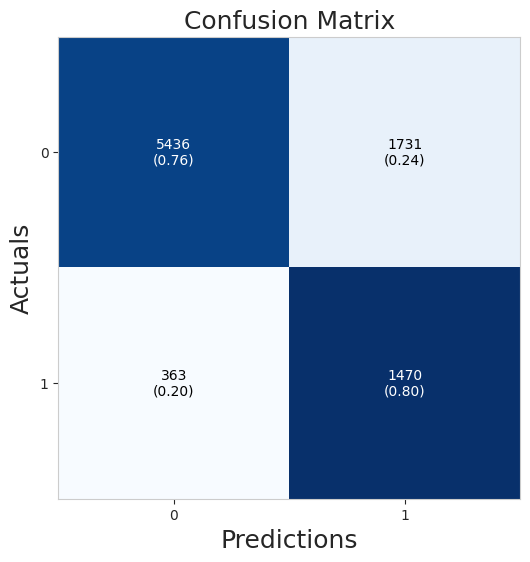


282/282 [==============================] - 1s 3ms/step
[[5436 1731]
 [ 363 1470]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7167
           1       0.46      0.80      0.58      1833

    accuracy                           0.77      9000
   macro avg       0.70      0.78      0.71      9000
weighted avg       0.84      0.77      0.79      9000



In [73]:
print("\tTrain_Set\n")
y_predctp = model_with_drop.predict(X_train) > 0.5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_predctp), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

y_pred = (model_with_drop.predict(X_train) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

32/32 [==============================] - 0s 3ms/step
	Test_Set



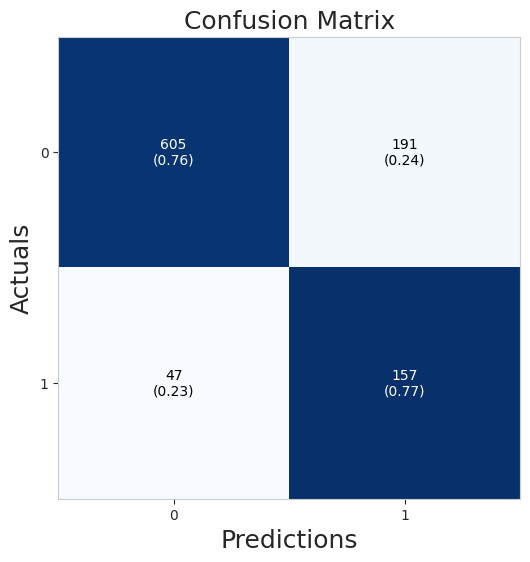

[[605 191]
 [ 47 157]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       796
           1       0.45      0.77      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.76      0.70      1000
weighted avg       0.83      0.76      0.78      1000



In [74]:
y_pred = (model_with_drop.predict(X_test) > 0.5).astype("int32")
print("\tTest_Set\n")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step


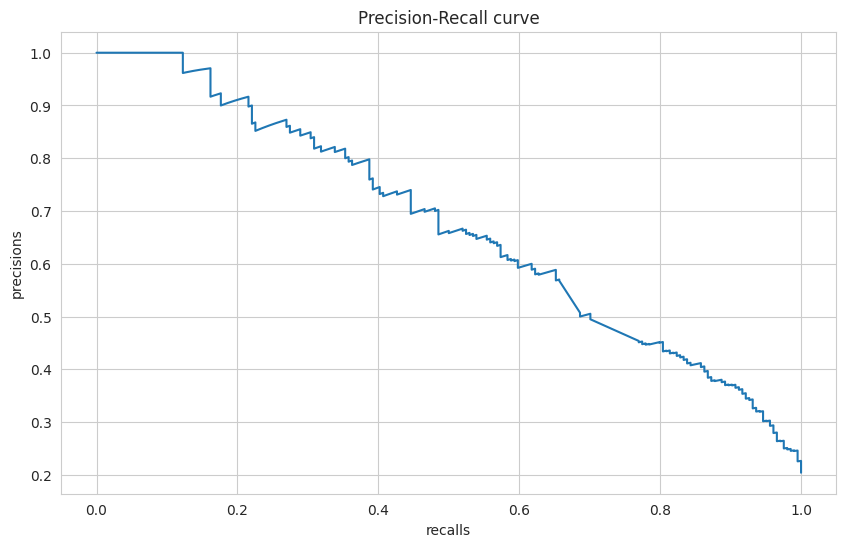

In [75]:
y_predctp = model_with_drop.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_predctp)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

### Add Early Stop

In [25]:
model_with_Elarly = Sequential()

tf.random.set_seed(seed)

model_with_Elarly.add(Dense(16, activation="relu"))
model_with_Elarly.add(Dense(8, activation="relu"))
model_with_Elarly.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.02)
model_with_Elarly.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

#### Monitor the "val_loss" as metric

In [26]:
early_stop = EarlyStopping( monitor="val_loss", mode="auto",
                           verbose=1,
                           patience=25,restore_best_weights=True)

In [27]:
model_with_Elarly.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights, callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.6266 - recall: 0.6332 - val_loss: 0.4985 - val_recall: 0.6022
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5631 - recall: 0.7113 - val_loss: 0.4163 - val_recall: 0.5359
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5360 - recall: 0.7270 - val_loss: 0.4500 - val_recall: 0.7845
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5120 - recall: 0.7591 - val_loss: 0.4973 - val_recall: 0.8232
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5159 - recall: 0.7530 - val_loss: 0.4168 - val_recall: 0.7735
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5016 - recall: 0.7446 - val_loss: 0.5185 - val_recall: 0.8398
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.4926 - recall: 0.7694 - val_loss: 0.3844 - val_recall: 0.7403
Epoch 8/200
64/64 [======================

In [80]:
loss_df = pd.DataFrame(model_with_Elarly.history.history)
loss_df.head(20)

,loss,recall,val_loss,val_recall
0,0.669,0.596,0.633,0.785
1,0.620,0.683,0.582,0.724
2,0.572,0.682,0.467,0.735
3,0.519,0.729,0.492,0.818
4,0.510,0.729,0.418,0.790
5,0.497,0.729,0.470,0.812
6,0.496,0.757,0.424,0.807
7,0.491,0.738,0.552,0.895
8,0.486,0.745,0.457,0.829
9,0.478,0.731,0.448,0.851


	Train_Set

282/282 [==============================] - 2s 5ms/step


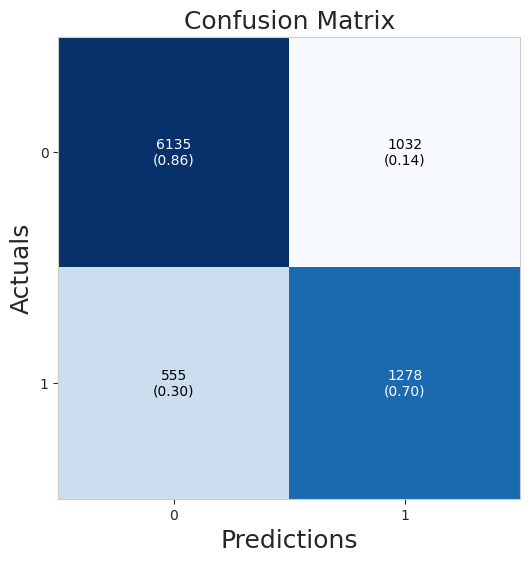


282/282 [==============================] - 1s 3ms/step
[[6135 1032]
 [ 555 1278]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7167
           1       0.55      0.70      0.62      1833

    accuracy                           0.82      9000
   macro avg       0.74      0.78      0.75      9000
weighted avg       0.84      0.82      0.83      9000



In [82]:
print("\tTrain_Set\n")
y_predctp = model_with_Elarly.predict(X_train) > 0.5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_predctp), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

y_pred = (model_with_Elarly.predict(X_train) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

32/32 [==============================] - 0s 2ms/step
	Test_Set



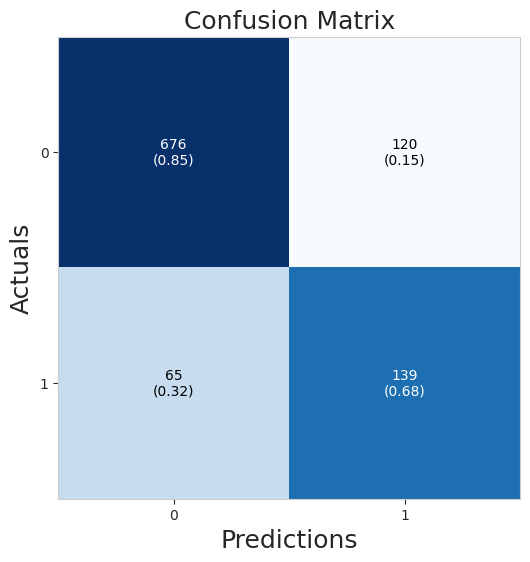

[[676 120]
 [ 65 139]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       796
           1       0.54      0.68      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.84      0.81      0.82      1000



In [83]:
y_pred = (model_with_Elarly.predict(X_test) > 0.5).astype("int32")
print("\tTest_Set\n")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step


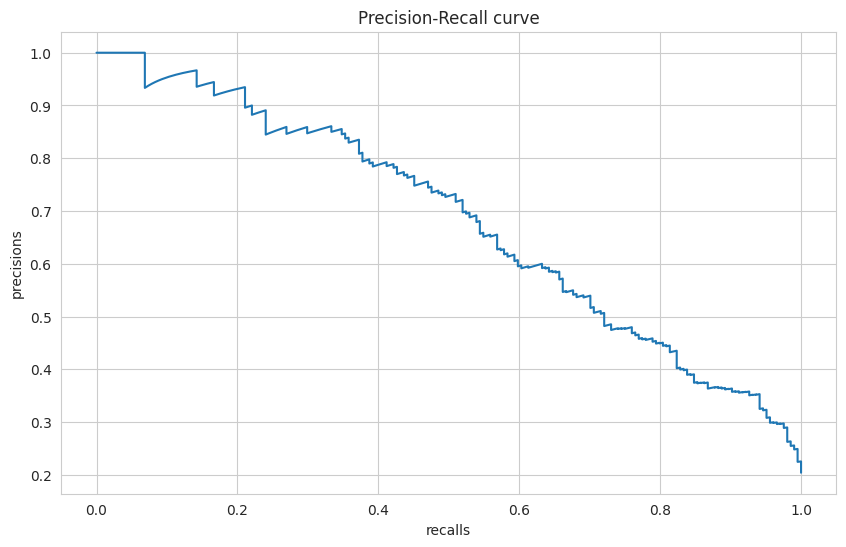

In [84]:
y_predctp = model_with_Elarly.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_predctp)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

#### Monitor the "val_recall" as metric

## Optuna

In [28]:
def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 0.001,0.005)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=['Recall'],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test,y_test),
        batch_size=64,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score




In [29]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2023-10-31 10:43:47,447] A new study created in memory with name: no-name-bb243be3-dfbd-454f-9770-0b41c20b7d49


Restoring model weights from the end of the best epoch: 72.
Epoch 97: early stopping


[I 2023-10-31 10:45:08,775] Trial 0 finished with value: 0.47549018263816833 and parameters: {'n_units1': 62, 'n_units2': 107, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001042718588202231, 'w0': 0.3923444540863915, 'w1': 0.3280931606997955}. Best is trial 0 with value: 0.47549018263816833.


Restoring model weights from the end of the best epoch: 25.
Epoch 50: early stopping


[I 2023-10-31 10:45:51,529] Trial 1 finished with value: 0.6666666865348816 and parameters: {'n_units1': 50, 'n_units2': 92, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0011709963621382982, 'w0': 0.44125888517603234, 'w1': 1.589182013360188}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 16.
Epoch 41: early stopping


[I 2023-10-31 10:46:13,708] Trial 2 finished with value: 0.03431372717022896 and parameters: {'n_units1': 114, 'n_units2': 78, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0014548353843635412, 'w0': 0.9103298199634415, 'w1': 0.017573555129969953}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-31 10:46:35,497] Trial 3 finished with value: 0.14705882966518402 and parameters: {'n_units1': 72, 'n_units2': 17, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0014389558731938584, 'w0': 0.013299884542989674, 'w1': 0.0883275560482409}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 102.
Epoch 127: early stopping


[I 2023-10-31 10:47:29,378] Trial 4 finished with value: 0.47058823704719543 and parameters: {'n_units1': 18, 'n_units2': 44, 'optimizer': <class 'keras.src.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.002699643811239164, 'w0': 0.052676641693785095, 'w1': 0.07575055685276715}. Best is trial 1 with value: 0.6666666865348816.
[I 2023-10-31 10:48:56,150] Trial 5 finished with value: 0.593137264251709 and parameters: {'n_units1': 29, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0023185440572375056, 'w0': 0.6961653477922669, 'w1': 2.8809692246902032}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 41.
Epoch 66: early stopping


[I 2023-10-31 10:49:26,368] Trial 6 finished with value: 0.38725489377975464 and parameters: {'n_units1': 46, 'n_units2': 109, 'optimizer': <class 'keras.src.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.0017211394571429897, 'w0': 2.141227511070779, 'w1': 1.23769897057237}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 99.
Epoch 124: early stopping


[I 2023-10-31 10:50:49,311] Trial 7 finished with value: 0.45098039507865906 and parameters: {'n_units1': 120, 'n_units2': 20, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.002759414601556313, 'w0': 4.295056601033948, 'w1': 2.9071634610424977}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 55.
Epoch 80: early stopping


[I 2023-10-31 10:51:30,159] Trial 8 finished with value: 0.11274509876966476 and parameters: {'n_units1': 115, 'n_units2': 66, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.003869310451728733, 'w0': 2.984203321286177, 'w1': 0.018873418528626788}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 68.
Epoch 93: early stopping


[I 2023-10-31 10:52:54,259] Trial 9 finished with value: 0.30392158031463623 and parameters: {'n_units1': 34, 'n_units2': 124, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0016311751261867621, 'w0': 0.3280075799565297, 'w1': 0.1048048923794059}. Best is trial 1 with value: 0.6666666865348816.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:53:21,860] Trial 10 finished with value: 0.813725471496582 and parameters: {'n_units1': 86, 'n_units2': 84, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001063664376058309, 'w0': 0.10437759197540927, 'w1': 0.7514180834711314}. Best is trial 10 with value: 0.813725471496582.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:54:03,905] Trial 11 finished with value: 0.7549019455909729 and parameters: {'n_units1': 88, 'n_units2': 85, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0010077135103949422, 'w0': 0.1373049273970759, 'w1': 0.740151198723769}. Best is trial 10 with value: 0.813725471496582.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:54:46,020] Trial 12 finished with value: 0.7254902124404907 and parameters: {'n_units1': 88, 'n_units2': 54, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0010021211853531858, 'w0': 0.10738602918526413, 'w1': 0.5005452826094021}. Best is trial 10 with value: 0.813725471496582.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:55:28,036] Trial 13 finished with value: 0.7303921580314636 and parameters: {'n_units1': 92, 'n_units2': 87, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0012562255477571451, 'w0': 0.1346681766538076, 'w1': 0.6876741901408959}. Best is trial 10 with value: 0.813725471496582.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:55:56,361] Trial 14 finished with value: 0.9852941036224365 and parameters: {'n_units1': 93, 'n_units2': 97, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0010073528503530868, 'w0': 0.06101098022756311, 'w1': 4.687286678145255}. Best is trial 14 with value: 0.9852941036224365.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:56:24,593] Trial 15 finished with value: 1.0 and parameters: {'n_units1': 101, 'n_units2': 100, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0012644130607162012, 'w0': 0.04198172014023471, 'w1': 4.641531023926129}. Best is trial 15 with value: 1.0.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:57:06,642] Trial 16 finished with value: 1.0 and parameters: {'n_units1': 103, 'n_units2': 102, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001865446394513237, 'w0': 0.03306546291253272, 'w1': 4.809562408198298}. Best is trial 15 with value: 1.0.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:57:48,716] Trial 17 finished with value: 1.0 and parameters: {'n_units1': 104, 'n_units2': 127, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001860670139444028, 'w0': 0.01826150982859175, 'w1': 4.593837453559481}. Best is trial 15 with value: 1.0.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:58:16,668] Trial 18 finished with value: 0.9950980544090271 and parameters: {'n_units1': 125, 'n_units2': 104, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001971596462374211, 'w0': 0.024171829332384036, 'w1': 1.5140459141917573}. Best is trial 15 with value: 1.0.


Restoring model weights from the end of the best epoch: 39.
Epoch 64: early stopping


[I 2023-10-31 10:58:44,422] Trial 19 finished with value: 0.9950980544090271 and parameters: {'n_units1': 72, 'n_units2': 66, 'optimizer': <class 'keras.src.optimizers.legacy.adam.Adam'>, 'learning_rate': 0.001332574710980366, 'w0': 0.035571991122054225, 'w1': 2.2076947446901434}. Best is trial 15 with value: 1.0.


{'n_units1': 101,
 'n_units2': 100,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0012644130607162012,
 'w0': 0.04198172014023471,
 'w1': 4.641531023926129}

In [30]:
# Extract the best hyperparameters obtained from the Optuna

unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(13)
model_op = Sequential()
model_op.add(Dense(unit1, activation="relu"))
model_op.add(Dropout(0.25))
model_op.add(Dense(unit2, activation="relu"))
model_op.add(Dropout(0.25))
model_op.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model_op.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])


In [31]:
model_op.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights, callbacks=[early_stop])

Epoch 1/200
64/64 [==============================] - 1s 7ms/step - loss: 0.6506 - recall: 0.5926 - val_loss: 0.6221 - val_recall: 0.7403
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6226 - recall: 0.6531 - val_loss: 0.5576 - val_recall: 0.6851
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6086 - recall: 0.6646 - val_loss: 0.5961 - val_recall: 0.7459
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5970 - recall: 0.6828 - val_loss: 0.6313 - val_recall: 0.8122
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5817 - recall: 0.6864 - val_loss: 0.4992 - val_recall: 0.6796
Epoch 6/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5753 - recall: 0.6737 - val_loss: 0.4967 - val_recall: 0.7017
Epoch 7/200
64/64 [==============================] - 0s 4ms/step - loss: 0.5599 - recall: 0.6985 - val_loss: 0.4829 - val_recall: 0.7127
Epoch 8/200
64/64 [======================

<Axes: >

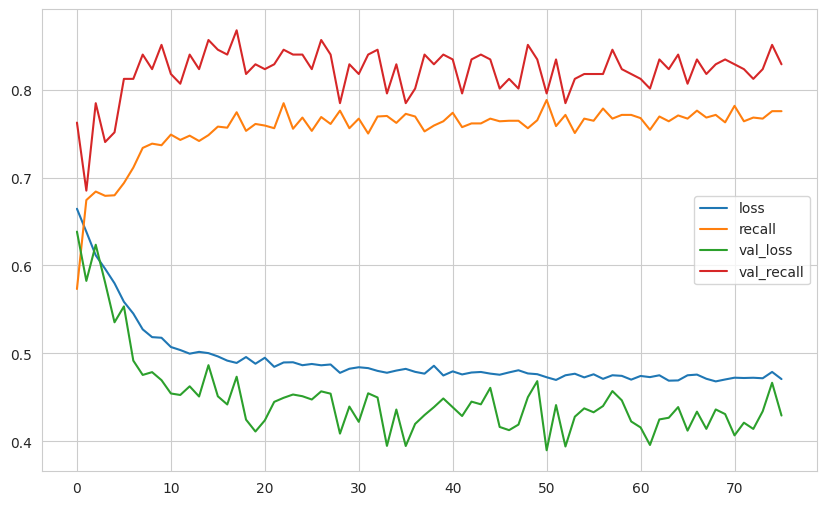

In [93]:
loss_df_t = pd.DataFrame(model_op.history.history)
loss_df_t.plot()

	Train_Set

282/282 [==============================] - 2s 5ms/step


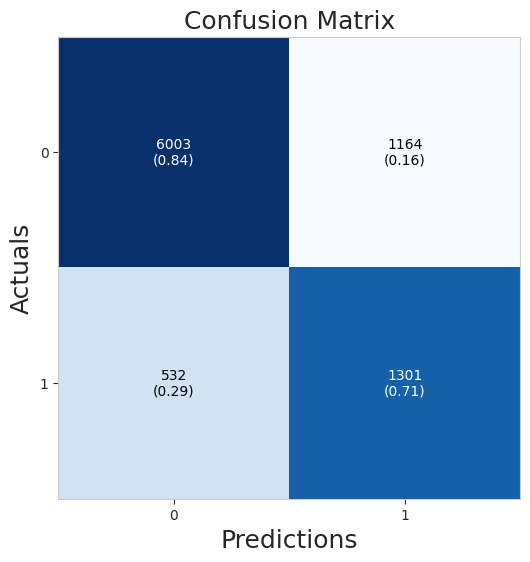


282/282 [==============================] - 1s 3ms/step
[[6003 1164]
 [ 532 1301]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      7167
           1       0.53      0.71      0.61      1833

    accuracy                           0.81      9000
   macro avg       0.72      0.77      0.74      9000
weighted avg       0.84      0.81      0.82      9000



In [32]:
print("\tTrain_Set\n")
y_predctp = model_op.predict(X_train) > 0.5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_predctp), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print()

y_pred = (model_op.predict(X_train) > 0.5).astype("int32")  # to convert the probabilities into binary values
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

32/32 [==============================] - 0s 2ms/step
	Test_Set



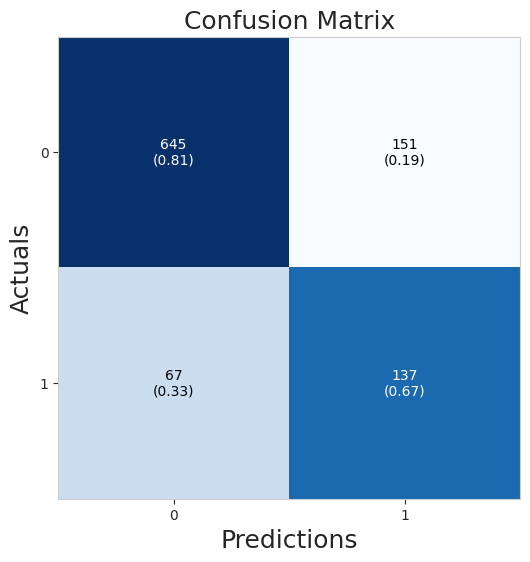

[[645 151]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.67      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.78      0.79      1000



In [33]:
y_pred = (model_op.predict(X_test) > 0.5).astype("int32")
print("\tTest_Set\n")
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


  # to convert the probabilities into binary values
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 7ms/step


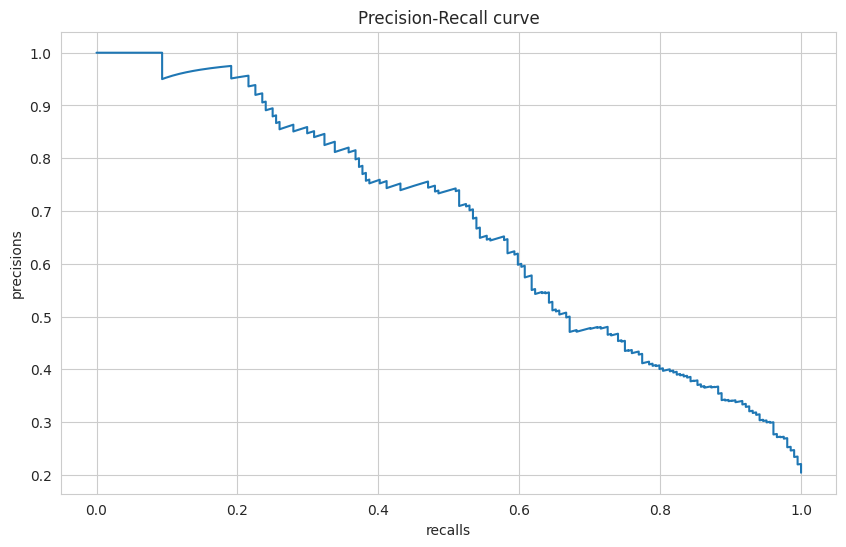

In [34]:
y_predctp = model_op.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_predctp)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

# Final Model and Model Deployment

In [35]:
#saving the model
model_op.save('customer_churn_model.keras')

## Prediction

In [37]:
#doing predictions on the entire test set
y_pred = model_op.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[645 151]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.48      0.67      0.56       204

    accuracy                           0.78      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.78      0.79      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___